In [159]:
import wandb
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
api = wandb.Api()
color=['blue', 'blue', 'green', 'green', 'red', 'red']


# 1. Load results from WandB

In [160]:
cora_mlp=api.run("luisawerner/nesy23/21kkd3hn").summary['test_accuracies']
cora_kenn_mlp=api.run("luisawerner/nesy23/3ro8287h").summary['test_accuracies']
cora_gcn=api.run("luisawerner/nesy23/e4g0y8u0").summary['test_accuracies']
cora_kenn_gcn=api.run("luisawerner/nesy23/1agooev5").summary['test_accuracies']
cora_gat=api.run("luisawerner/nesy23/1ip2vw3v").summary['test_accuracies']
cora_kenn_gat=api.run("luisawerner/nesy23/3ob9d8s0").summary['test_accuracies']

In [161]:
pubmed_mlp=api.run("luisawerner/nesy23/3vol5qrs").summary['test_accuracies']
pubmed_kenn_mlp=api.run("luisawerner/nesy23/2tnphpvq").summary['test_accuracies']
pubmed_gcn=api.run("luisawerner/nesy23/sml5bi91").summary['test_accuracies']
pubmed_kenn_gcn=api.run("luisawerner/nesy23/2bkseqxp").summary['test_accuracies']
pubmed_gat = api.run("luisawerner/nesy23/2tnswjml").summary['test_accuracies']
pubmed_kenn_gat = api.run("luisawerner/nesy23/1fv9jhuv").summary['test_accuracies']

In [162]:
citeseer_mlp=api.run("luisawerner/nesy23/6nulutmt").summary['test_accuracies']
citeseer_kenn_mlp=api.run("luisawerner/nesy23/2jhyvc06").summary['test_accuracies']
citeseer_gcn=api.run("luisawerner/nesy23/10w9ru13").summary['test_accuracies']
citeseer_kenn_gcn=api.run("luisawerner/nesy23/lsrwas08").summary['test_accuracies']
citeseer_gat = api.run("luisawerner/nesy23/2qcz3ccs").summary['test_accuracies']
citeseer_kenn_gat = api.run("luisawerner/nesy23/nfvfp6nj").summary['test_accuracies']

In [163]:
flickr_mlp=api.run("luisawerner/nesy23/39y1lkxu").summary['test_accuracies']
flickr_kenn_mlp=api.run("luisawerner/nesy23/18bmvs3p").summary['test_accuracies']
flickr_gcn=api.run("luisawerner/nesy23/2yg139x5").summary['test_accuracies']
flickr_kenn_gcn=api.run("luisawerner/nesy23/2a90jqbn").summary['test_accuracies']
flickr_kenn_gat = api.run("luisawerner/nesy23/byjp9gjy").summary['test_accuracies'][:10]
flickr_gat = api.run("luisawerner/nesy23/yt6ttff6").summary['test_accuracies']

# 2. View Results
## Cora Dataset
Results of one-sided t-test for Cora
H1: mean test accuracy of KE_X > mean test accuracy of X
If p-value below significance threshold --> H1 true

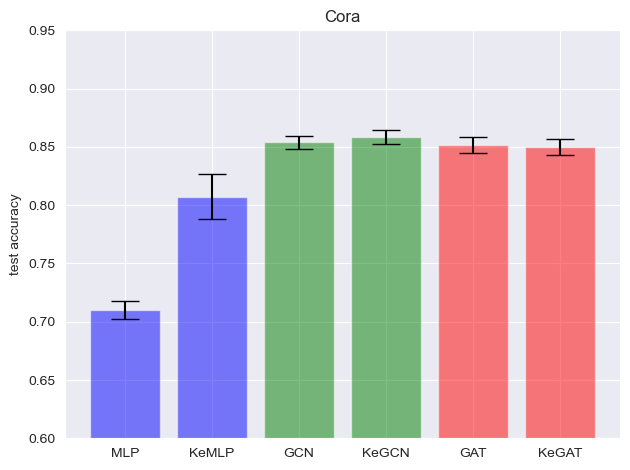

Mean Average Test Accuracy over 50 runs: 
MLP: 0.7098399999999999, KeMLP: 0.8072400000000001
GCN: 0.85382, KeGCN: 0.8586800000000001
GAT: 0.8517199999999999, KeGAT: 0.8498399999999998


p-value KeMLP > MLP for Cora: 3.9986805821323845e-55
p-value KeGCN > GCN for Cora: 3.0847335812368674e-05
p-value KeGAT > GAT for Cora: 0.9181665832178568


In [179]:

xpos = np.arange(6)
cora_means = [np.mean(cora_mlp), np.mean(cora_kenn_mlp), np.mean(cora_gcn), np.mean(cora_kenn_gcn), np.mean(cora_gat), np.mean(cora_kenn_gat)]
cora_errors = [np.std(cora_mlp), np.std(cora_kenn_mlp), np.std(cora_gcn), np.std(cora_kenn_gcn), np.std(cora_gat), np.std(cora_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, cora_means, yerr=cora_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Cora')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.6, 0.95)
plt.tight_layout()
plt.savefig('results_cora.pdf', format='pdf')
plt.show()
plt.close()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(cora_mlp)}, KeMLP: {np.mean(cora_kenn_mlp)}' )
print(f'GCN: {np.mean(cora_gcn)}, KeGCN: {np.mean(cora_kenn_gcn)}' )
print(f'GAT: {np.mean(cora_gat)}, KeGAT: {np.mean(cora_kenn_gat)}' )
print ('\n')

print(f'p-value KeMLP > MLP for Cora: {scipy.stats.ttest_ind(cora_kenn_mlp, cora_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Cora: {scipy.stats.ttest_ind(cora_kenn_gcn, cora_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for Cora: {scipy.stats.ttest_ind(cora_kenn_gat, cora_gat, alternative="greater")[1]}')

# CiteSeer Dataset

Mean Average Test Accuracy over 50 runs: 
MLP: 0.7278200000000001, KeMLP: 0.7528800000000001
GCN: 0.7479600000000001, KeGCN: 0.75062
GAT: 0.7718200000000001, KeGAT: 0.7734399999999999


p-value KeMLP > MLP for CiteSeer: 5.236566694584563e-31
p-value KeGCN > GCN for CiteSeer: 0.09065088587292602
p-value KeGAT > GAT for CiteSeer: 0.13332461658163747


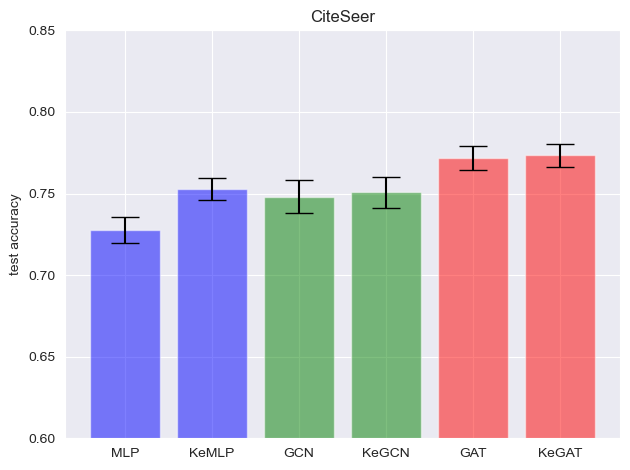

In [178]:
xpos = np.arange(6)
citeseer_means = [np.mean(citeseer_mlp), np.mean(citeseer_kenn_mlp), np.mean(citeseer_gcn), np.mean(citeseer_kenn_gcn), np.mean(citeseer_gat), np.mean(citeseer_kenn_gat)]
citeseer_errors = [np.std(citeseer_mlp), np.std(citeseer_kenn_mlp), np.std(citeseer_gcn), np.std(citeseer_kenn_gcn), np.std(citeseer_gat), np.std(citeseer_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, citeseer_means, yerr=citeseer_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('CiteSeer')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.savefig('results_citeseer.pdf', format='pdf')
# plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(citeseer_mlp)}, KeMLP: {np.mean(citeseer_kenn_mlp)}' )
print(f'GCN: {np.mean(citeseer_gcn)}, KeGCN: {np.mean(citeseer_kenn_gcn)}' )
print(f'GAT: {np.mean(citeseer_gat)}, KeGAT: {np.mean(citeseer_kenn_gat)}' )
print ('\n')



print(f'p-value KeMLP > MLP for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_mlp, citeseer_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gcn, citeseer_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for CiteSeer: {scipy.stats.ttest_ind(citeseer_kenn_gat, citeseer_gat, alternative="greater")[1]}')


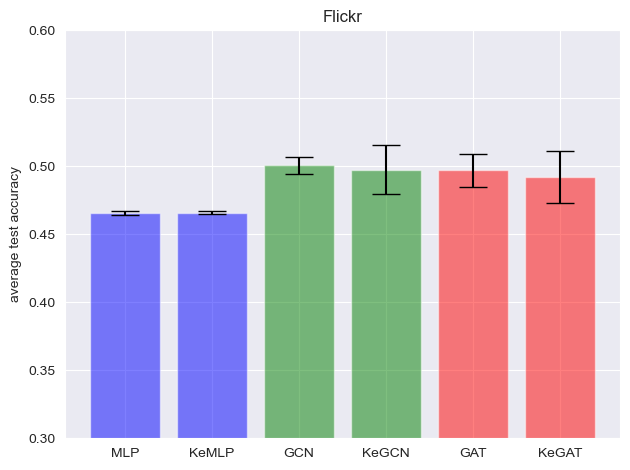

Mean Average Test Accuracy over 10 runs: 
MLP: 0.465634383543226 (0.0017608032302256005), KeMLP: 0.46592569354188146 (0.0013005867928203446)
GCN: 0.5007036256890601 (0.006364154539571432), KeGCN: 0.4974409537041186 (0.017933179062878835)
GAT: 0.497010711244566 (0.012362564379906273), KeGAT: 0.49199569757540446 (0.018938482513340623)


p-value KeMLP > MLP for Flickr: 0.34721129645060733
p-value KeGCN > GCN for Flickr: 0.6933761050409264
p-value KeGAT > GAT for Flickr: 0.7428307754394381


In [177]:
# flickr
color=['blue', 'blue', 'green', 'green', 'red', 'red']
xpos = np.arange(6)
flickr_means = [np.mean(flickr_mlp), np.mean(flickr_kenn_mlp), np.mean(flickr_gcn), np.mean(flickr_kenn_gcn), np.mean(flickr_gat), np.mean(flickr_kenn_gat)]
flickr_errors = [np.std(flickr_mlp), np.std(flickr_kenn_mlp), np.std(flickr_gcn), np.std(flickr_kenn_gcn), np.std(flickr_gat), np.std(flickr_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, flickr_means, yerr=flickr_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('average test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Flickr')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.3, 0.6)
plt.tight_layout()
plt.savefig('results_flickr.pdf', format='pdf')
plt.show()
print(f'Mean Average Test Accuracy over {len(flickr_mlp)} runs: ')
print(f'MLP: {np.mean(flickr_mlp)} ({np.std(flickr_mlp)}), KeMLP: {np.mean(flickr_kenn_mlp)} ({np.std(flickr_kenn_mlp)})' )
print(f'GCN: {np.mean(flickr_gcn)} ({np.std(flickr_gcn)}), KeGCN: {np.mean(flickr_kenn_gcn)} ({np.std(flickr_kenn_gcn)})' )
print(f'GAT: {np.mean(flickr_gat)} ({np.std(flickr_gat)}), KeGAT: {np.mean(flickr_kenn_gat)} ({np.std(flickr_kenn_gat)})' )
print ('\n')

print(f'p-value KeMLP > MLP for Flickr: {scipy.stats.ttest_ind(flickr_kenn_mlp, flickr_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for Flickr: {scipy.stats.ttest_ind(flickr_kenn_gcn, flickr_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for Flickr: {scipy.stats.ttest_ind(flickr_kenn_gat, flickr_gat, alternative="greater")[1]}')


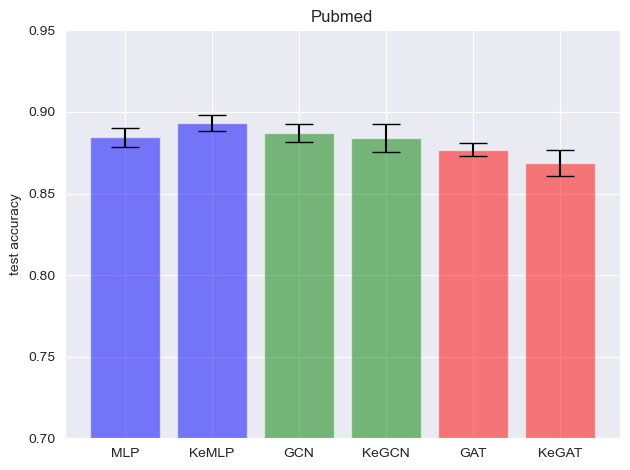

Mean Average Test Accuracy over 50 runs: 
MLP: 0.8844399999999999 (0.005738153012947638), KeMLP: 0.8930599999999999 (0.004768270126576308)
GCN: 0.8870199999999998 (0.0053497289650972085), KeGCN: 0.884 (0.008708616422830905)
GAT: 0.87688 (0.003957979282411673), KeGAT: 0.8687599999999999 (0.008130338246346219)


p-value KeMLP > MLP for PubMed: 8.243639036545687e-13
p-value KeGCN > GCN for PubMed: 0.9793811522051503
p-value KeGAT > GAT for PubMed: 0.9999999954683192


In [180]:
# PubMed
xpos = np.arange(6)
means = [np.mean(pubmed_mlp), np.mean(pubmed_kenn_mlp), np.mean(pubmed_gcn), np.mean(pubmed_kenn_gcn), np.mean(pubmed_gat), np.mean(pubmed_kenn_gat)]
errors = [np.std(pubmed_mlp), np.std(pubmed_kenn_mlp), np.std(pubmed_gcn), np.std(pubmed_kenn_gcn), np.std(pubmed_gat), np.std(pubmed_kenn_gat)]
fig, ax = plt.subplots()
ax.bar(xpos, means, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
ax.set_ylabel('test accuracy')
ax.set_xticks(xpos)
ax.set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
ax.set_title('Pubmed')
ax.yaxis.grid(True)

# Save the figure and show
plt.ylim(0.7, 0.95)
plt.tight_layout()
plt.savefig('results_pubmed.pdf', format='pdf')
plt.show()

print(f'Mean Average Test Accuracy over {len(pubmed_mlp)} runs: ')
print(f'MLP: {np.mean(pubmed_mlp)} ({np.std(pubmed_mlp)}), KeMLP: {np.mean(pubmed_kenn_mlp)} ({np.std(pubmed_kenn_mlp)})' )
print(f'GCN: {np.mean(pubmed_gcn)} ({np.std(pubmed_gcn)}), KeGCN: {np.mean(pubmed_kenn_gcn)} ({np.std(pubmed_kenn_gcn)})' )
print(f'GAT: {np.mean(pubmed_gat)} ({np.std(pubmed_gat)}), KeGAT: {np.mean(pubmed_kenn_gat)} ({np.std(pubmed_kenn_gat)})' )
print ('\n')
print(f'p-value KeMLP > MLP for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_mlp, pubmed_mlp, alternative="greater")[1]}')
print(f'p-value KeGCN > GCN for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_gcn, pubmed_gcn, alternative="greater")[1]}')
print(f'p-value KeGAT > GAT for PubMed: {scipy.stats.ttest_ind(pubmed_kenn_gat, pubmed_gat, alternative="greater")[1]}')


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (6,).

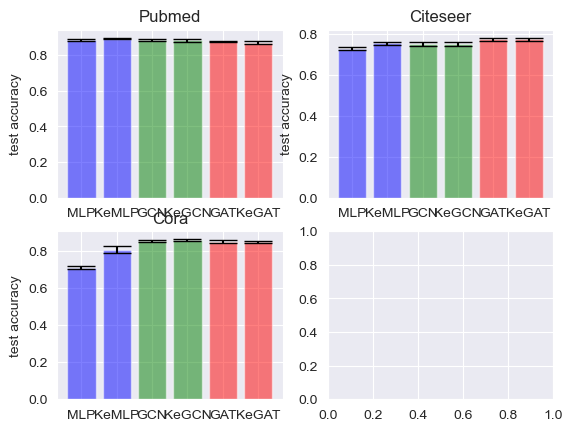

In [168]:
# Create Multiplot
# TODO not well formated, did it better in latex
fig, axs = plt.subplots(2, 2)
xpos = np.arange(6)
pubmed_means = [np.mean(pubmed_mlp), np.mean(pubmed_kenn_mlp), np.mean(pubmed_gcn), np.mean(pubmed_kenn_gcn), np.mean(pubmed_gat), np.mean(pubmed_kenn_gat)]
pubmed_errors = [np.std(pubmed_mlp), np.std(pubmed_kenn_mlp), np.std(pubmed_gcn), np.std(pubmed_kenn_gcn), np.std(pubmed_gat), np.std(pubmed_kenn_gat)]
axs[0,0].bar(xpos, pubmed_means, yerr=pubmed_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
axs[0,0].set_ylabel('test accuracy')
axs[0,0].set_xticks(xpos)
axs[0,0].set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
# axs[0,0].ylim(0.6, 1.0)
axs[0,0].set_title('Pubmed')

axs[0,1].bar(xpos, citeseer_means, yerr=citeseer_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
axs[0,1].set_ylabel('test accuracy')
axs[0,1].set_xticks(xpos)
axs[0,1].set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
# axs[0,1].ylim(0.5, 0.85)
axs[0,1].set_title('Citeseer')

axs[1,0].bar(xpos, cora_means, yerr=cora_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
axs[1,0].set_ylabel('test accuracy')
axs[1,0].set_xticks(xpos)
axs[1,0].set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN', 'GAT', 'KeGAT'])
# axs[1,0].ylim(0.5, 0.9)
axs[1,0].set_title('Cora')

xpos = np.arange(4)
axs[1,1].bar(xpos, flickr_means, yerr=flickr_errors, align='center', alpha=0.5, ecolor='black', capsize=10, color=color)
axs[1,1].set_ylabel('test accuracy')
axs[1,1].set_xticks(xpos)
axs[1,1].set_xticklabels(['MLP', 'KeMLP', 'GCN', 'KeGCN'])
axs[1,1].set_title('Flickr ')







## Clause weight analysis 'light': take the learned clause weights from the final layer and interpret correlation with compliance


Initialization: 0.5


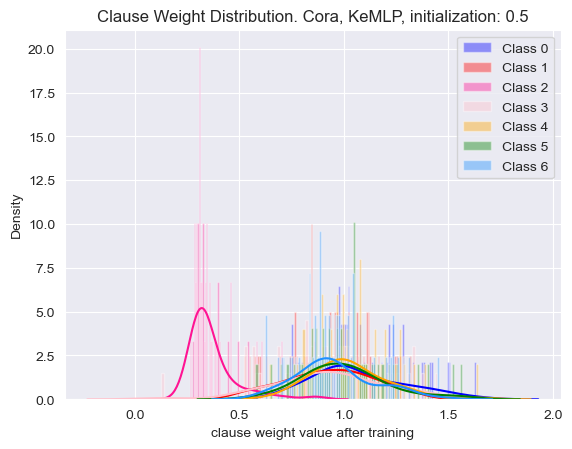

In [169]:
# Cora KeMLP
run = api.run("luisawerner/nesy23/3ro8287h")
cw_0 = run.config["clause_weight"]
print(f'Initialization: {cw_0}')
cora_cw = eval(run.summary['logged_clause_weights'])
import seaborn as sns

# ke layer 0, clause 0
w_class0 = [value[0]['0'][-1] for _, value  in cora_cw.items()]
w_class1 = [value[0]['1'][-1] for _, value  in cora_cw.items()]
w_class2 = [value[0]['2'][-1] for _, value  in cora_cw.items()]
w_class3 = [value[0]['3'][-1] for _, value  in cora_cw.items()]
w_class4 = [value[0]['4'][-1] for _, value  in cora_cw.items()]
w_class5 = [value[0]['5'][-1] for _, value  in cora_cw.items()]
w_class6 = [value[0]['6'][-1] for _, value  in cora_cw.items()]

bins = 100

#color = plt.cm.rainbow(np.linspace(0, 1, 7))
sns.distplot(w_class0, bins=bins, color= 'blue', label= 'Class 0')
sns.distplot(w_class1, bins=bins, color= 'red', label= 'Class 1')
sns.distplot(w_class2, bins=bins, color= 'deeppink', label= 'Class 2')
sns.distplot(w_class3, bins=bins, color= 'pink', label= 'Class 3')
sns.distplot(w_class4, bins=bins, color= 'orange', label= 'Class 4')
sns.distplot(w_class5, bins=bins, color= 'green', label= 'Class 5')
sns.distplot(w_class6, bins=bins, color= 'dodgerblue', label= 'Class 6')
plt.legend()
plt.title(f'Clause Weight Distribution. Cora, KeMLP, initialization: {cw_0}')
plt.xlabel('clause weight value after training')
plt.savefig('cora_kenn_mlp_cw_dist.png')
plt.show()



Initialization: random


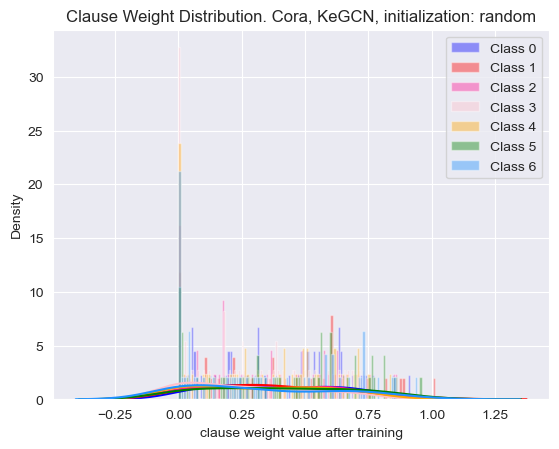

In [170]:
# Cora KeGCN
import seaborn as sns
run = api.run("luisawerner/nesy23/1agooev5")
cw_0 = run.config["clause_weight"]
print(f'Initialization: {cw_0}')
cora_cw = eval(run.summary['logged_clause_weights'])

# ke layer 0, clause 0
w_class0 = [value[0]['0'][-1] for _, value  in cora_cw.items()]
w_class1 = [value[0]['1'][-1] for _, value  in cora_cw.items()]
w_class2 = [value[0]['2'][-1] for _, value  in cora_cw.items()]
w_class3 = [value[0]['3'][-1] for _, value  in cora_cw.items()]
w_class4 = [value[0]['4'][-1] for _, value  in cora_cw.items()]
w_class5 = [value[0]['5'][-1] for _, value  in cora_cw.items()]
w_class6 = [value[0]['6'][-1] for _, value  in cora_cw.items()]

bins = 100

#color = plt.cm.rainbow(np.linspace(0, 1, 7))
sns.distplot(w_class0, bins=bins, color= 'blue', label= 'Class 0')
sns.distplot(w_class1, bins=bins, color= 'red', label= 'Class 1')
sns.distplot(w_class2, bins=bins, color= 'deeppink', label= 'Class 2')
sns.distplot(w_class3, bins=bins, color= 'pink', label= 'Class 3')
sns.distplot(w_class4, bins=bins, color= 'orange', label= 'Class 4')
sns.distplot(w_class5, bins=bins, color= 'green', label= 'Class 5')
sns.distplot(w_class6, bins=bins, color= 'dodgerblue', label= 'Class 6')
plt.legend()
plt.title(f'Clause Weight Distribution. Cora, KeGCN, initialization: {cw_0}')
plt.xlabel('clause weight value after training')
plt.savefig('cora_KeGGN_cw_dist.png')
plt.show()



Initialization: 0.5


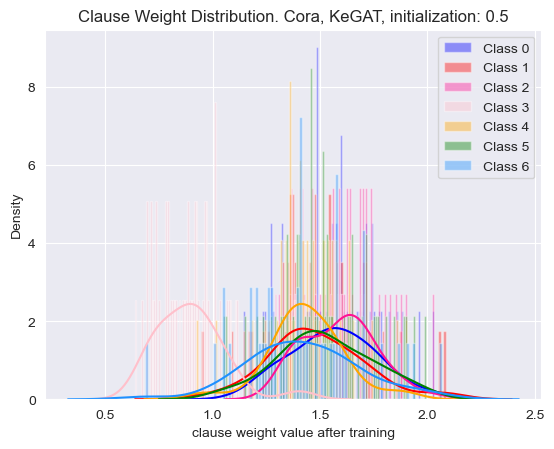

In [171]:
# Cora KeGAT
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

run = api.run("luisawerner/nesy23/3ob9d8s0")
cw_0 = run.config["clause_weight"]
print(f'Initialization: {cw_0}')
cora_cw = eval(run.summary['logged_clause_weights'])

# ke layer 0, clause 0
w_class0 = [value[0]['0'][-1] for _, value  in cora_cw.items()]
w_class1 = [value[0]['1'][-1] for _, value  in cora_cw.items()]
w_class2 = [value[0]['2'][-1] for _, value  in cora_cw.items()]
w_class3 = [value[0]['3'][-1] for _, value  in cora_cw.items()]
w_class4 = [value[0]['4'][-1] for _, value  in cora_cw.items()]
w_class5 = [value[0]['5'][-1] for _, value  in cora_cw.items()]
w_class6 = [value[0]['6'][-1] for _, value  in cora_cw.items()]

bins = 100

#color = plt.cm.rainbow(np.linspace(0, 1, 7))
sns.distplot(w_class0, bins=bins, color= 'blue', label= 'Class 0')
sns.distplot(w_class1, bins=bins, color= 'red', label= 'Class 1')
sns.distplot(w_class2, bins=bins, color= 'deeppink', label= 'Class 2')
sns.distplot(w_class3, bins=bins, color= 'pink', label= 'Class 3')
sns.distplot(w_class4, bins=bins, color= 'orange', label= 'Class 4')
sns.distplot(w_class5, bins=bins, color= 'green', label= 'Class 5')
sns.distplot(w_class6, bins=bins, color= 'dodgerblue', label= 'Class 6')
plt.legend()
plt.title(f'Clause Weight Distribution. Cora, KeGAT, initialization: {cw_0}')
plt.xlabel('clause weight value after training')
plt.savefig('cora_KeGAT_cw_dist.png')
plt.show()



In [172]:
# Clause Weights Analysis for Cora
bins = 100
import seaborn as sns
import warnings
import matplotlib.patches as mpatches
warnings.simplefilter(action='ignore', category=FutureWarning)

# make legend
handles = []
for i in range(7):
    handles.append(mpatches.Patch(color=color[i], label='Cls_' + str(i)))
fig.legend(handles=handles)

fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('Clause Weights Analysis for Cora ')
color= ['blue', 'red', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']

# Cora KeMLP
run_mlp = api.run("luisawerner/nesy23/3ro8287h")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_cora_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23/1agooev5")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_cora_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23/3ob9d8s0")
gat_cw_0 = gat_run.config["clause_weight"]
gat_cora_cw = eval(gat_run.summary['logged_clause_weights'])

# KeMLP
for i in ['0', '1', '2', '3', '4', '5', '6']:
    sns.distplot([value[0][i][-1] for _, value  in mlp_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[0] )
axs[0].set_title(f'KeMLP, initialization: {mlp_cw_0}')

#KeGCN
for i in ['0', '1', '2', '3', '4', '5', '6']:
    sns.distplot([value[0][i][-1] for _, value  in gcn_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[1] )
axs[1].set_title(f'KeGCN, initialization: {gcn_cw_0}')

# KeMLP
for i in ['0', '1', '2', '3', '4', '5', '6']:
    sns.distplot([value[0][i][-1] for _, value  in gat_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[2] )
axs[2].set_title(f'KeGAT, initialization: {gat_cw_0}')


fig.legend(handles=handles)
plt.savefig('new_cora_clauseweights.png')
plt.show()

IndexError: list index out of range

In [ ]:
# Clause Weights Analysis for CiteSeer

bins = 100
import seaborn as sns
import warnings
import matplotlib.patches as mpatches
warnings.simplefilter(action='ignore', category=FutureWarning)

# make legend
handles = []
for i in range(6):
    handles.append(mpatches.Patch(color=color[i], label='Cls_' + str(i)))
fig.legend(handles=handles)

fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('Clause Weights Analysis for CiteSeer')
color= ['blue', 'red', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']

# Citeseer KeMLP
run_mlp = api.run("luisawerner/nesy23/2jhyvc06")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_cora_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23/lsrwas08")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_cora_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23/nfvfp6nj")
gat_cw_0 = gat_run.config["clause_weight"]
gat_cora_cw = eval(gat_run.summary['logged_clause_weights'])

# KeMLP
for i in ['0', '1', '2', '3', '4', '5']:
    sns.distplot([value[0][i][-1] for _, value  in mlp_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[0] )
axs[0].set_title(f'KeMLP, initialization: {mlp_cw_0}')

#KeGCN
for i in ['0', '1', '2', '3', '4', '5']:
    sns.distplot([value[0][i][-1] for _, value  in gcn_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[1] )
axs[1].set_title(f'KeGCN, initialization: {gcn_cw_0}')

# KeMLP
for i in ['0', '1', '2', '3', '4', '5']:
    sns.distplot([value[0][i][-1] for _, value  in gat_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[2] )
axs[2].set_title(f'KeGAT, initialization: {gat_cw_0}')


fig.legend(handles=handles)
plt.savefig('new_citeseer_clauseweights.png')
plt.show()


In [ ]:
# PubMed Clause Weights Plot
bins = 100
import seaborn as sns
import warnings
import matplotlib.patches as mpatches
warnings.simplefilter(action='ignore', category=FutureWarning)

# make legend
handles = []
for i in range(3):
    handles.append(mpatches.Patch(color=color[i], label='Cls_' + str(i)))
fig.legend(handles=handles)

fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('Clause Weights Analysis for PubMed')
color= ['blue', 'red', 'deeppink', 'violet', 'orange', 'green', 'dodgerblue']
# Citeseer KeMLP
run_mlp = api.run("luisawerner/nesy23/2tnphpvq")
mlp_cw_0 = run_mlp.config["clause_weight"]
mlp_cora_cw = eval(run_mlp.summary['logged_clause_weights'])

gcn_run = api.run("luisawerner/nesy23/2bkseqxp")
gcn_cw_0 = gcn_run.config["clause_weight"]
gcn_cora_cw = eval(gcn_run.summary['logged_clause_weights'])

gat_run = api.run("luisawerner/nesy23/1fv9jhuv")
gat_cw_0 = gat_run.config["clause_weight"]
gat_cora_cw = eval(gat_run.summary['logged_clause_weights'])

# KeMLP
for i in ['0', '1', '2']:
    sns.distplot([value[0][i][-1] for _, value  in mlp_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[0] )
axs[0].set_title(f'KeMLP, initialization: {mlp_cw_0}')

#KeGCN
for i in ['0', '1', '2']:
    sns.distplot([value[0][i][-1] for _, value  in gcn_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[1] )
axs[1].set_title(f'KeGCN, initialization: {gcn_cw_0}')

# KeMLP
for i in ['0', '1', '2']:
    sns.distplot([value[0][i][-1] for _, value  in gat_cora_cw.items()], bins=bins, color=color[int(i)], label=str('Cls_'+ i), ax=axs[2] )
axs[2].set_title(f'KeGAT, initialization: {gat_cw_0}')


fig.legend(handles=handles)
plt.savefig('pubmed_clauseweights.png')
plt.show()
